# Exercise 7: K-means Clustering and Principal Component Analysis

# K-Means Clustering

## 1.1 Implementing K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns

from pandas import DataFrame as dframe

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# ================= Part 1: Find Closest Centroids ====================
# This part will help you implement K-Means, the learning algorithm is divided into two functions 
# --findClosesCentroids and computeCentroids

In [3]:
def findClosestCentroids(X, centroids):
    '''
    FINDCLOSESTCENTROIDS computes the centroid memberships for every example
       idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
       in idx for a dataset X where each row is a single example. idx = m x 1 
       vector of centroid assignments (i.e. each entry in range [1..K])
    '''
    
    # set K
    K = centroids.shape[0]

    # You need to return this variable
    idx = np.zeros([X.shape[0], 1])

    # Variable that store distance between sample X and centroids
    distance = np.zeros([X.shape[0], centroids.shape[0]])
    m = X.shape[0]

    # Distance to all centroids, distance of ith X to jth centroid will be stored in i, j cell
    for i in range(K):
        distance[:, i] = np.sum((X - centroids[i])**2, axis=1)

    # Inspect each row, find which has minimum value, that's the closest centroid to respective data
    idx = np.argmin(distance, axis=1).astype(dtype=np.uint8)
    
    return idx

In [4]:
# Load an example dataset that we will be using
data = sio.loadmat('ex7data2.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
# Store X
X = data['X']

In [7]:
X.shape

(300, 2)

In [8]:
# Select initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([3, 3, 6, 2, 8, 5]).reshape(-1, 2)

In [9]:
initial_centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

### 1.1.1 Finding closest centroids 

In [10]:
# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

In [11]:
idx

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0], d

In [12]:
# The second sentence is modified to match python indexing, originally it was "should be 1, 3, 2 respectively"
print('Closest centroids for the first 3 examples:\n %s' %(idx[:3]))
print('the closest centroids should be 0, 2, 1 respectively')

Closest centroids for the first 3 examples:
 [0 2 1]
the closest centroids should be 0, 2, 1 respectively


### 1.1.2 Computing centroid means

In [13]:
# ===================== Part 2: Compute Means =========================
# After implementing the closest centroids function, you should now
# complete the computeCentroids function.

In [14]:
def computeCentroids(X, idx, K):
    '''
    COMPUTECENTROIDS returns the new centroids by computing the means of the 
    data points assigned to each centroid.
       centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
       computing the means of the data points assigned to each centroid. It is
       given a dataset X where each row is a single data point, a vector
       idx of centroid assignments (i.e. each entry in range [1..K]) for each
       example, and K, the number of centroids. You should return a matrix
       centroids, where each row of centroids is the mean of the data points
       assigned to it.
    '''
    
    # Useful variables
    m, n = X.shape

    # Need to return the following variable
    centroids = np.zeros([K, n])

    # The new centroids are the mean of assigned dataset to respective centroids
    for i in range(K):
        centroids[i, :] = np.mean(X[idx==i], 0)
        
    return centroids

In [15]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

In [16]:
print('Centroids computed after initial finding of closest centroids: ')
print('%s' %centroids)
print('the centroids should be:\n [2.428301 3.157924 ]\n [5.813503 2.633656 ]\n [7.119387 3.616684 ]\n')

Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
the centroids should be:
 [2.428301 3.157924 ]
 [5.813503 2.633656 ]
 [7.119387 3.616684 ]



## 1.2 K-means on example dataset

In [17]:
# =================== Part 3: K-Means Clustering ======================
# In this part, you will run the K-Means algorithm on the example dataset we have provided
def runkMeans(X, initial_centroids, max_iters, plot_progress):
    '''  
    RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
       [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
       plot_progress) runs the K-Means algorithm on data matrix X, where each 
       row of X is a single example. It uses initial_centroids used as the
       initial centroids. max_iters specifies the total number of interactions 
       of K-Means to execute. plot_progress is a true/false flag that 
       indicates if the function should also plot its progress as the 
       learning happens. This is set to false by default. runkMeans returns 
       centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
       vector of centroid assignments (i.e. each entry in range [1..K])
    
    This code is slightly modified from the MATLAB's version, such that it unable to show
    the history of each iteration step. Nevertheless, it outputs similar results
    '''
    
    # Initialize some values
    m, n  = X.shape
    K = initial_centroids.shape[0]
    idx = np.zeros([m, 1])

    # Set up the initial centroids value to plot
    previous_centroids = initial_centroids
    current_centroids = previous_centroids
    
    if plot_progress:
        plt.figure(figsize=(7, 5))
    
    # Run K-Means
    for i in range(max_iters):

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, current_centroids)

        if plot_progress:
            
            palette = sns.color_palette(None, K) 

            # Plot the K cluster using different colors
            for j in range(K):
                plt.title('Iteration Number: %d' %(i+1))
                plt.scatter(X[idx==j, 0], X[idx==j, 1], edgecolor=palette[j], color='none', alpha=0.3)


                # Plot the centroids as black x's 
                plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='x', c='k', s=80)
                plt.scatter(current_centroids[:, 0], current_centroids[:, 1], marker='x', c='k', s=80)

                # Plot the history of centroids as black lines
                plt.plot((previous_centroids[:, 0], current_centroids[:, 0]),\
                         (previous_centroids[:, 1], current_centroids[:, 1]), lw=2, color='k')

        # Given the memberships, compute new centroids
        new_centroids = computeCentroids(X, idx, K);

        previous_centroids = current_centroids
        current_centroids = new_centroids
    
    
    plt.show()
    
    return new_centroids, idx

In [18]:
# Load an example dataset
data = sio.loadmat('ex7data2.mat')

In [19]:
X = data['X']

In [20]:
# Settings for running K-Means
K = 3;
max_iters = 10;

In [21]:
# Select initial set of centroids
initial_centroids = np.array([3, 3, 6, 2, 8, 5]).reshape(-1, 2)

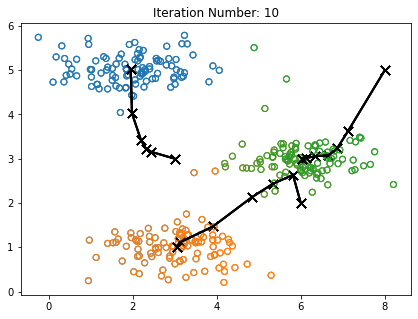

In [22]:
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

In [23]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

## 1.3 Random initialization

In [24]:
# In this part of the exercise, you should complete the function kMeansInitCentroids
def kMeansInitCentroids(X, K):
    '''
    KMEANSINITCENTROIDS This function initializes K centroids that are to be used in K-Means on the dataset X
        centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be 
        used with the K-Means on the dataset X
    '''
    centroids = np.zeros([K, X.shape[1]])
    
    # randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first 
    centroids = X[randidx[:K], :]
    
    return centroids

## 1.4 Image compression with K -means

In [25]:
# ============= Part 4: K-Means Clustering on Pixels ===============
# In this exercise, you will use K-Means to compress an image. To do this,
# you will first run K-Means on the colors of the pixels in the image and
# then you will map each pixel onto its closest centroid.

In [26]:
# Load image of a bird
A = plt.imread('bird_small.png')

In [27]:
A.shape

(128, 128, 3)

In [28]:
dframe(A[ :10, :10, 1])

,0,1,2,3,4,5,6,7,8,9
0,0.705882,0.725490,0.729412,0.725490,0.701961,0.733333,0.725490,0.733333,0.717647,0.674510
1,0.756863,0.752941,0.752941,0.745098,0.764706,0.756863,0.737255,0.721569,0.725490,0.698039
2,0.749020,0.749020,0.725490,0.725490,0.725490,0.745098,0.741176,0.721569,0.694118,0.698039
3,0.713726,0.705882,0.717647,0.705882,0.737255,0.756863,0.729412,0.717647,0.717647,0.701961
4,0.690196,0.713726,0.725490,0.721569,0.752941,0.745098,0.729412,0.749020,0.713726,0.705882
5,0.709804,0.737255,0.725490,0.737255,0.741176,0.725490,0.741176,0.725490,0.694118,0.694118
6,0.709804,0.713726,0.721569,0.737255,0.709804,0.709804,0.725490,0.686275,0.674510,0.674510
7,0.705882,0.709804,0.705882,0.713726,0.674510,0.674510,0.678431,0.686275,0.678431,0.674510
8,0.760784,0.756863,0.756863,0.741176,0.733333,0.709804,0.698039,0.698039,0.690196,0.678431
9,0.756863,0.756863,0.752941,0.745098,0.729412,0.717647,0.698039,0.682353,0.682353,0.678431


In [29]:
# Size of the image
img_size = A.shape

In [30]:
img_size

(128, 128, 3)

In [31]:
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, [A.shape[0]* A.shape[1], 3], order='C')

In [32]:
X.shape

(16384, 3)

In [33]:
# To confirm content of X print first 10 values of X
dframe(X[:10])

,0,1,2
0,0.858824,0.705882,0.403922
1,0.901961,0.725490,0.454902
2,0.886275,0.729412,0.431373
3,0.874510,0.725490,0.411765
4,0.882353,0.701961,0.403922
5,0.894118,0.733333,0.450980
6,0.894118,0.725490,0.435294
7,0.894118,0.733333,0.447059
8,0.882353,0.717647,0.419608
9,0.854902,0.674510,0.376471


In [34]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

In [35]:
# When using K-Means, it is important the initialize the centroids randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

In [36]:
# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

In [37]:
centroids

array([[0.19520159, 0.1869251 , 0.17814283],
       [0.12997481, 0.13860972, 0.12969613],
       [0.84440589, 0.60304254, 0.30039835],
       [0.96115083, 0.85411578, 0.62781137],
       [0.06649382, 0.07225724, 0.06208805],
       [0.79753935, 0.71574104, 0.6912207 ],
       [0.09341759, 0.10095833, 0.09038134],
       [0.47913504, 0.43520942, 0.44603631],
       [0.52830243, 0.65503824, 0.82224149],
       [0.96929109, 0.93869591, 0.8166334 ],
       [0.86212569, 0.71222413, 0.4524886 ],
       [0.69716352, 0.5084973 , 0.24116097],
       [0.41753027, 0.31761762, 0.24911502],
       [0.55230165, 0.40737146, 0.19638734],
       [0.27491388, 0.26010397, 0.26619923],
       [0.66286868, 0.57885897, 0.48945168]])

In [38]:
# ================= Part 5: Image Compression ======================
# In this part, you will use the clusters of K-Means to
# compress an image. First find the closest clusters for each example.

In [39]:
# Find closest cluster members
idx = findClosestCentroids(X, centroids)

In [40]:
# After representing X in terms of indices in idx, we recover image by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx,:]

In [41]:
X_recovered.shape

(16384, 3)

In [42]:
# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, [img_size[0], img_size[1], 3])

In [43]:
# The first 10 rows & columns of X_recovered
dframe(X_recovered[:10, :10, 0])

,0,1,2,3,4,5,6,7,8,9
0,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
1,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
2,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
3,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
4,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
5,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
6,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
7,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
8,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126
9,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126,0.862126


In [44]:
X_recovered.shape

(128, 128, 3)

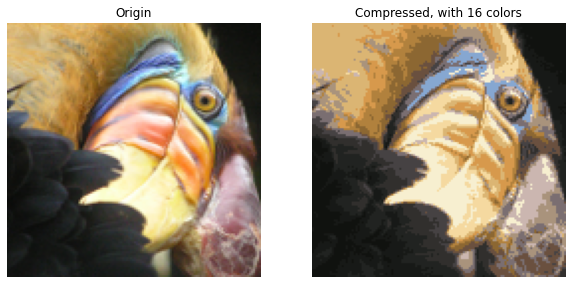

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(A, origin='upper')
ax1.set_title('Origin')
ax1.axis('off')
ax2.imshow(X_recovered, origin='upper')
ax2.set_title('Compressed, with 16 colors')
ax2.axis('off')
plt.show()